# Learn Python Data Analytics By Example: NY Parking Violations

### Introduction

While working towards my Master's in Business Analytics, I found that learning by example is the best way for me to learn Python data analytics.  Being given a dataset and a set of coding tasks is much more beneficial than reading a textbook or listening to a professor.  

I want to share this method of learning with others who will also benefit.  All you need is a Python development environment (I recommend [Jupyter Notebook](https://jupyter.org/)) and a willingness to learn and have fun.

Included in this article is a list of data analytics tasks, followed by a detailed walkthrough of how to complete the tasks.  Please try to complete the tasks yourself before reading through the walkthrough - you will get more out of it that way.  Do keep in mind that there are many many ways to solve coding problems, so your code likely will not match mine word for word.

### Project Description

For this project we will use a dataset of 50,000 parking violations issued in New York City during the 2021 fiscal year.  The dataset was created in January 2021 and contains data from April 1 to November 30, 2020 sourced from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2021/pvqr-7yc4).

You will need to install the [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) libraries, if you do not already have them.


### Data Analytics Tasks

Please perform the following tasks in Python using the *violations.csv* dataset available from the GitHub repo.
1. Read the CSV file containing the NYC parking violation data. Change the 'Issue Date' column to a date format. Then print out the number of rows imported.
2. Perform exploratory data analysis on the imported dataset to identify invalid data.  Write code to remove the impacted rows.  Then print out the number of rows remaining in the dataset.
3. Display a simple plot that shows the number of parking violations issued for each vehicle year.
4. List the top 5 violation codes for vehicles that are registered in states other than NY.
5. Name the street where Hondas received the most parking violations.
6. For vehicles that are from NY only, create a plot displaying the ratio of plate types that are not passenger, month by month.
7. Determine whether the color of vehicles with passenger plates receiving the most violations is the same as the color of vehicles with commercial plates receiving the most violations.
8. Display the number of registration states represented in the data and the average number of parking violations per registration state.
9. Display the plate type that has the most parking violations for each violation code.
10. Calculate the percentage of parking violations in each county and display in descending order.

### Step 1: Read the CSV file containing the NYC parking violation data.  Change the 'Issue Date' column to a date format.  Then print out the number of rows imported.

In [1]:
import pandas as pd

# Read the file and import all rows.
df = pd.read_csv('violations.csv')

# Change the data type of the 'Issue Date' column to date.
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

# Print out the number of rows imported from the file.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 50000


#### Code Explanation:

We start by making the contents of the pandas module available to our program.  pandas is an easy to use open source data analysis and manipulation tool, built on top of the Python programming language.  We will use it extensively throughout this project.

```
import pandas as pd
```

We import the contents of the *violations.csv* file by calling the read_csv() method and store it in a DataFrame, named *df*.  A DataFrame is a two-dimensional data structure with labeled axes, consisting of data, rows and columns.  Think of it like a table built in Microsoft Excel or Microsoft Access.

```
df = pd.read_csv('violations.csv')
```

We use the print() function to print the string 'Number of Rows:' followed by the number of rows in the DataFrame.  The argument that we pass to the print() function is made up of two parts.  The first is the string 'Number of Rows: ' surrounded in single quotes, denoting it as a string.  The second part of the argument is calculating the number of rows in *df*.  We use the len() function to tell us the number of rows in *df*, then wrap it in a call to the str() method to convert the length into a string. Finally, the + concatenates (or joins) the two string parts together.  All parts of the argument passed to the print() function must be of type string.

```
print('Number of Rows: ' + str(len(df)))
```

### Step 2: Perform exploratory data analysis on the imported dataset to identify invalid data.  Write code to remove the impacted rows.  Then print out the number of rows remaining in the dataset.

The following data is considered to be invalid:
* Registration State: values that are not a two letter state or province identifier.
* Plate Type: values that are not a three letter identifier ([Registration Class Codes](https://dmv.ny.gov/registration/registration-class-codes))
* Issue Date: dates not within the fiscal year (use 2020-11-30 as the end of the fiscal year)
* Violation Code: codes other than those between 1 and 99 ([Violation Codes](https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page))
* Vehicle Make: blank values
* Violation Time: blank values
* Vehicle Year: vehicles with dates in the future (use 2020 as the current year)

In [2]:
# Remove rows containing invalid data.
df = df[(df['Registration State'] != "99") & (df['Plate Type'] != "999") & (df['Issue Date'] >= '2020-04-01')
                 & (df['Issue Date'] <= '2020-11-30') & (df['Violation Code'] != 0) & (df['Vehicle Make'].notnull())
                 & (df['Violation Time'].notnull()) & (df['Vehicle Year'] != 0) & (df['Vehicle Year'] <= 2020)]

# Print out the number of rows remaining in the dataset.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 38937


#### Code Explanation:

We need to subset *df* to filter out records with invalid data.  We are able to apply multiple parameters at once by wrapping each in parentheses and using the & character between them.  We use != to represent not equal to, >= to represent greater than or equal to and <= to represent less than or equal to.  For the Vehicle Make and Violation Time columns, we need to check for null values by calling the notnull() method.

```
df = df[(df['Registration State'] != "99") & (df['Plate Type'] != "999") & (df['Issue Date'] >= '2020-04-01')
                 & (df['Issue Date'] <= '2020-11-30') & (df['Violation Code'] != 0) & (df['Vehicle Make'].notnull())
                 & (df['Violation Time'].notnull()) & (df['Vehicle Year'] != 0) & (df['Vehicle Year'] <= 2020)]
```

We use the print() function in exactly the same way as Step 1 above.

```
print('Number of Rows: ' + str(len(df)))
```

### Step 3: Display a simple plot that shows the number of parking violations issued for each vehicle year. 

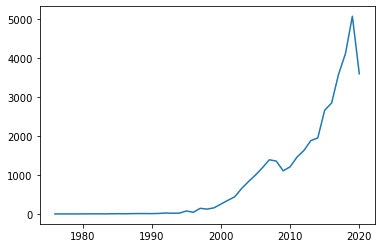

In [3]:
import matplotlib.pyplot as plt

# Isolate the data to be used in the plot.
df_vehicle_year = df.groupby('Vehicle Year')['Summons Number'].count()

# Create a plot that shows the number of parking violations for each vehicle year.
plt.plot(df_vehicle_year)
plt.show()

#### Code Explanation:

We make the contents of the matplotlib library available to our program. matplotlib is a comprehensive library for creating visualizations in Python.

```
import matplotlib.pyplot as plt
```

We need to create a dataset for the plot, containing vehicle year and the number of parking violations for each those years.  To do this, we group the records in *df* by vehicle year and count the number of parking violations for each year.  Each parking violation has a unique summons number.

```
df_vehicle_year = df.groupby('Vehicle Year')['Summons Number'].count()
```

We use the plot() function of matplotlib to create the plot.  As an argument, we simply pass the new dataset that we created.  Then we use the show() function to display the plot.

```
plt.plot(df_vehicle_year)
plt.show()
```

### Step 4: List the top 5 violation codes for vehicles that are registered in states other than NY.

In [4]:
df[df['Registration State'] != 'NY'].groupby('Violation Code')['Summons Number'].count().nlargest(5).reset_index(name='Count')

,Violation Code,Count
0,36,2772
1,5,365
2,7,350
3,12,62
4,21,30


#### Code Explanation:

There are a lot of elements in this single line of code to unpack, so we will take it one step at a time.  Take your time to understand this line, as we will use this structure many more times in the steps to follow.

In the first part of the statement, we filter *df* to only those records with a registration state of NY.

```
df[df['Registration State'] != 'NY']
```

Next we group the resulting records by violation code and count the number of parking violations for each violation code.

```
.groupby('Violation Code')['Summons Number'].count()
```

We display the violation codes with the 5 highest counts by using the nlargest() method and passing it the argument 5.  The first n rows with the largest values in the count column, in descending order, are displayed.

```
.nlargest(5)
```

Finally, we use the the reset_index() method to reset the DataFrame index to the original one.  We use it here to present the results in a more elegant manner.  We pass the name argument of 'Count' to name the column containing the count values.

```
.reset_index(name='Count')
```

### Step 5: Name the street where Hondas received the most parking violations.

In [5]:
df[df['Vehicle Make'] == 'HONDA'].groupby('Street Name')['Summons Number'].count().nlargest(1).reset_index(name='Count')

,Street Name,Count
0,Broadway,34


#### Code Explanation:

This line of code closely follows the structure of what we used in Step 4 above.  In this instance we filter *df* to only those records with a vehicle make of Honda, group the resulting records by street name, count the number of parking violations for each street and display only the street with the most parking violations.

```
df[df['Vehicle Make'] == 'HONDA'].groupby('Street Name')['Summons Number'].count().nlargest(1).reset_index(name='Count')
```

### Step 6: For vehicles that are from NY only, create a plot displaying the ratio of plate types that are not passenger, month by month.

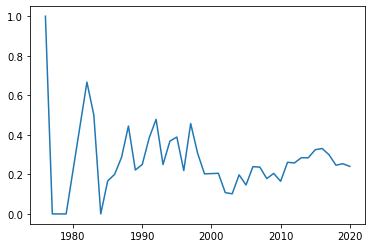

In [6]:
# Subset for only rows where the Registration State is NY.
df_ny = df[df['Registration State'] == 'NY']

# Calculate the ratio of non-passenger plates to all plates, grouped by year. 
df_ny_notpas = df_ny[df_ny['Plate Type'] != 'PAS'].groupby('Vehicle Year')['Summons Number'].count()
df_ny_all = df_ny.groupby('Vehicle Year')['Summons Number'].count()
ratio = df_ny_notpas / df_ny_all

# Replace nulls with 0.
ratio.fillna(0, inplace = True)

# Create and show plot.
plt.plot(ratio)
plt.show()

#### Code Explanation:

We subset *df* by selecting only those records with a registration state of NY and store it as *df_ny*.

```
df_ny = df[df['Registration State'] == 'NY']
```

To calculate the requested ratios, we need to create a dataset to represent the numerator (number of parking violations for all non-passenger vehicles by vehicle year) and another to represent the denominator (number of parking violations for all vehicles by vehicle year).

For the numerator we filter *df_ny* to only those records with a plate type not equal to passenger, group the resulting records by vehicle year and count the number of parking violations for each year.  We store this as *df_ny_notpas*.

```
df_ny_notpas = df_ny[df_ny['Plate Type'] != 'PAS'].groupby('Vehicle Year')['Summons Number'].count()
```

For the denominator we don't need to filter *df_ny* as we need all records. Instead we just group the records by vehicle year and count the number of parking violations for each year.  We store this as *df_ny_all*.

```
df_ny_all = df_ny.groupby('Vehicle Year')['Summons Number'].count()
```

To calculate the ratios for each year, we simply divide the numerator by the denominator.  This is part of the magic of pandas, where it applies the division function to each of the count pairs in the DataFrames, year by year.  When a vehicle year appears in only one of the DataFrames, the result is NaN.

```
ratio = df_ny_notpas / df_ny_all
```

We are unable to plot NaN values, so we replace them with 0 using the fillna() method on the *ratio* Dataframe.  The inplace=True parameter updates the values directly in *ratio*.

```
ratio.fillna(0, inplace = True)
```

We use the plot() function of matplotlib to create the plot. As an argument, we simply pass the new dataset that we created. Then we use the show() function to display the plot.

```
plt.plot(ratio)
plt.show()
```

### Step 7: Determine whether the color of vehicles with passenger plates receiving the most violations is the same as the color of vehicles with commercial plates receiving the most violations. 

In [7]:
df[df['Plate Type'] == 'PAS'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count')

,Vehicle Color,Count
0,GY,7797


#### Code Explanation:

We filter *df* to only those records with a plate type of passenger, group the resulting records by vehicle color, count the number of parking violations for each color and display the color with the most parking violations using nlargest().

```
df[df['Plate Type'] == 'PAS'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count')
```

In [8]:
df[df['Plate Type'] == 'COM'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count')

,Vehicle Color,Count
0,WH,2882


#### Code Explanation:

We filter *df* to only those records with a plate type of commercial, group the resulting records by vehicle color, count the number of parking violations for each color and display the color with the most parking violations using nlargest().

```
df[df['Plate Type'] == 'COM'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count')
```

### Step 8: Display the number of registration states represented in the data and the average number of parking violations per registration state.

In [9]:
print('Number of Registration States: ' + str(df['Registration State'].nunique()))

print('Average Number of Parking Violations per Registration State: ' +  
      str(df.groupby('Registration State')['Summons Number'].count().mean()))

Number of Registration States: 45
Average Number of Parking Violations per Registration State: 865.2666666666667


#### Code Explanation:

We print the string 'Number of Registration States' concatenated with the count of registration states in *df*.  To determine the number of registration states we call the nunique() method on the registration state column in *df*, which returns the count of distinct observations, i.e., the number of unique states listed in the column.  As we did before, we use str() to convert the numeric value into a string.

```
print('Number of Registration States: ' + str(df['Registration State'].nunique()))
```

We print the string 'Average Number of Parking Violations per Registration State' concatenated with the average number of parking violations.  To calculate the latter, we group the rows in *df* by registration state, count the number of parking violations for each state and then average the counts by calling the mean() method.

```
print('Average Number of Parking Violations per Registration State: ' +  
      str(df.groupby('Registration State')['Summons Number'].count().mean()))
```

### Step 9: Display the plate type that has the most parking violations for each violation code.

In [10]:
df.groupby('Violation Code')['Plate Type'].apply(lambda x: x.value_counts().head(1)).reset_index(name='Count').rename(columns={'level_1': 'Plate Type'})

,Violation Code,Plate Type,Count
0,4,COM,4
1,5,PAS,1080
2,6,APP,3
3,7,PAS,1398
4,8,COM,1
...,...,...,...
70,91,PAS,2
71,94,PAS,2
72,95,PAS,1
73,98,PAS,92


#### Code Explanation:

In this step, we are using more advanced functionality.  We will break this code down into snippets to explain.

We start by grouping the records in *df* by violation code.  

```
df.groupby('Violation Code')['Plate Type']
```

Next, we want to determine which plate type gets the most parking violations for each of the violation codes.  To do this we need to apply a function along an axis of the grouped data.  Because we do not specify the axis, it defaults to 0, which is the index.  

The lambda function calls the value_counts() method on each group (violation code) and counts the number of instances of each plate type per group, in descending order.  The call to the head() method then gives us the top plate type for each violation code group.

```
.apply(lambda x: x.value_counts().head(1))
```

We use the the reset_index() method to reset the DataFrame index to the original one. We use it here to present the results in a more elegant manner. We pass the name argument of 'Count' to name the column containing the count values.

```
.reset_index(name='Count')
```

Finally, we call the rename() method to rename the level_1 column as Plate Type, to make the output more readable.

```
.rename(columns={'level_1': 'Plate Type'})
```

### Step 10: Calculate the percentage of parking violations in each county and display in descending order.

In [11]:
# Count the number of parking violations in each county.
df_county = df.groupby('Violation County')['Summons Number'].count().reset_index(name='Percentage')

# Calculate the number of parking violations in each county as a percentage of all parking violations.
df_county['Percentage'] = df_county['Percentage'] / df_county['Percentage'].sum() * 100

# Sort and display the resulting dataframe.
df_county.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

,Violation County,Percentage
0,NY,20.769903
1,BK,15.104917
2,QN,13.734314
3,BX,13.371734
4,K,13.104300
5,Q,12.983440
6,MN,6.912158
7,ST,3.342934
8,R,0.676301


#### Code Explanation:

We group the rows in *df* by violation county, count the number of parking violations for each violation county and then store it as *df_county*.  We call the reset_index() method to reset the index and to rename the result column as Percentage.

```
df_county = df.groupby('Violation County')['Summons Number'].count().reset_index(name='Percentage')
```

We replace the previously calculated values in the Percentage column by dividing them by the total sum of violations to calculate a percentage for each.

```
df_county['Percentage'] = df_county['Percentage'] / df_county['Percentage'].sum() * 100
```

Finally, we call the sort_values method on *df_county* to sort the percentages in descending order.

```
df_county.sort_values(by='Percentage', ascending=False).reset_index(drop=True)
```

I hope you have found this project a useful way to learn Python data analytics.  Please share your feedback in the comments section.